## ヒストグラム

(array([  22.,  129.,  577., 1834., 2805., 2674., 1468.,  424.,   60.,
           7.]),
 array([ 25.09288245,  40.43865029,  55.78441813,  71.13018596,
         86.4759538 , 101.82172163, 117.16748947, 132.51325731,
        147.85902514, 163.20479298, 178.55056082]),
 <a list of 10 Patch objects>)

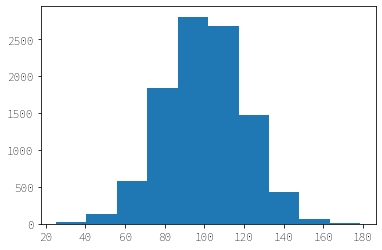

In [1]:
# リスト 4.6.1　ヒストグラムの描画

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(12345)
%matplotlib inline
x = np.random.normal(100, 20, 10000)

# ヒストグラムの描画
fig, ax = plt.subplots(1, 1)
ax.hist(x)

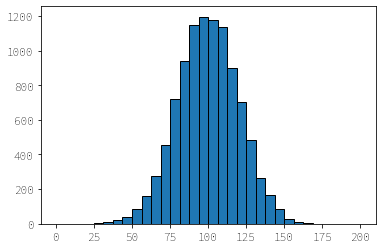

In [2]:
# リスト 4.6.2　引数を指定したヒストグラムの描画

fig, ax = plt.subplots(1, 1)
ax.hist(x, bins=32, range=(0, 200), edgecolor="black")

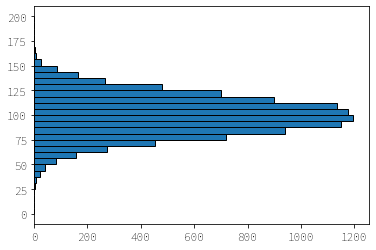

In [3]:
# リスト 4.6.3　横向きのヒストグラムの描画

fig, ax = plt.subplots(1, 1)
ax.hist(x, bins=32, range=(0, 200), orientation="horizontal", edgecolor="black")

In [4]:
# リスト 4.6.4　anime_master.csv ファイルの読み込み

from urllib.parse import urljoin
import pandas as pd

base_url = "https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/"
anime_master_csv = urljoin(base_url, "anime_master.csv")
df_master = pd.read_csv(anime_master_csv, index_col="anime_id")
df_master.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
# リスト 4.6.5　エピソード数の記述統計量を出力

df_tv = df_master[df_master["type"] == "TV"]
episode_number = df_tv["episodes"]
episode_number.describe()

count    3330.000000
mean       37.456156
std        83.326301
min         3.000000
25%        13.000000
50%        25.000000
75%        43.000000
max      1818.000000
Name: episodes, dtype: float64

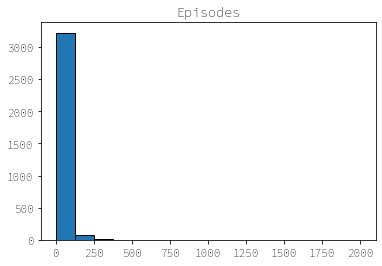

In [6]:
# リスト 4.6.6　エピソード数の可視化

fig, ax = plt.subplots(1, 1)
ax.hist(episode_number, bins=16, range=(0, 2000), edgecolor="black")
ax.set_title("Episodes")

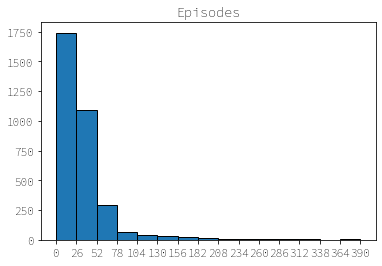

In [7]:
# リスト 4.6.7　エピソード数の可視化（描画範囲を制限）

fig, ax = plt.subplots(1, 1)
ax.hist(episode_number, bins=15, range=(0, 390), edgecolor="black")
ax.set_xticks(np.arange(0, 391, 26).astype("int64"))
ax.set_title("Episodes")

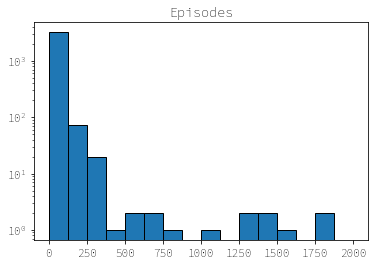

In [8]:
# リスト 4.6.8　エピソード数の可視化（対数軸）

fig, ax = plt.subplots(1, 1)
ax.hist(episode_number, bins=16, range=(0, 2000), log=True, edgecolor="black")
ax.set_title("Episodes")

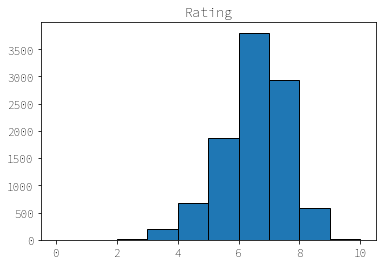

In [9]:
# リスト 4.6.9　レーティングの可視化

df_rating = df_master["rating"]
rating_range = (0, 10)
fig, ax = plt.subplots(1, 1)
ax.hist(df_rating, range=rating_range, edgecolor="black")
ax.set_title("Rating")

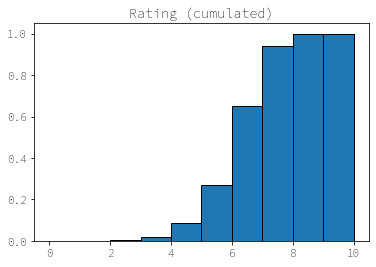

In [10]:
# リスト 4.6.10　相対度数の累積ヒストグラムの描画

fig, ax = plt.subplots(1, 1)

# cumulativeをTrueに指定
ax.hist(
    df_rating,
    range=rating_range,
    density=True,
    cumulative=True,
    edgecolor="black",
)
ax.set_title("Rating (cumulated)")

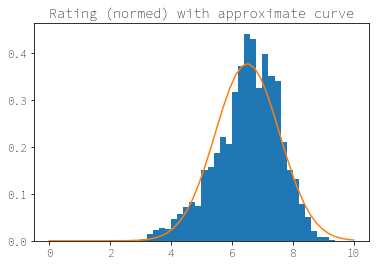

In [11]:
# リスト 4.6.11　近似曲線の追加

from scipy.stats import norm

# 階級数
bins = 50

# 平均と標準偏差
mu, sigma = df_rating.mean(), df_rating.std()

# ヒストグラムの描画
fig, ax = plt.subplots(1, 1)
ax.hist(df_rating, bins=bins, range=rating_range, density=True)

# X値（ビンの区切りの値）
x = np.linspace(rating_range[0], rating_range[1], bins)

# Y値（近似的な確率密度関数を使用して生成）
y = norm.pdf(x, mu, sigma)

# 近似曲線の描画
ax.plot(x, y)
ax.set_title("Rating (normed) with approximate curve")

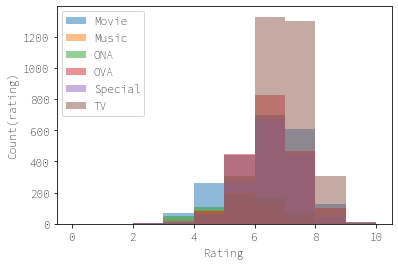

In [12]:
# リスト 4.6.12　複数グループのヒストグラムを重ねて描画

fig, ax = plt.subplots(1, 1)

for type_, data in df_master.groupby("type"):
    ax.hist(data["rating"], range=rating_range, alpha=0.5, label=type_)

ax.legend()
ax.set_xlabel("Rating")
ax.set_ylabel("Count(rating)")

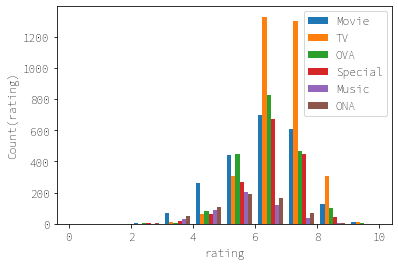

In [13]:
# リスト 4.6.13　複数グループのヒストグラムを並べて描画

# データセットの作成
types = df_master["type"].unique()
dataset = [
    df_master.loc[df_master["type"] == type_, "rating"] for type_ in types
]
fig, ax = plt.subplots(1, 1)
ax.hist(dataset, range=rating_range, label=types)
ax.legend()
ax.set_xlabel("rating")
ax.set_ylabel("Count(rating)")

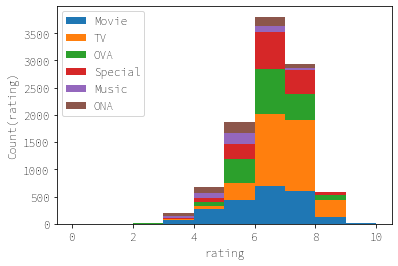

In [14]:
# リスト 4.6.14　積み上げヒストグラムの描画

# dataset, labelsは「並べて描画」で作成したものを使用
fig, ax = plt.subplots(1, 1)
ax.hist(dataset, range=rating_range, label=types, stacked=True)
ax.legend()
ax.set_xlabel("rating")
ax.set_ylabel("Count(rating)")